In [27]:
import pandas as pd
import numpy as np
from pandas import read_excel

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from ast import literal_eval  # 用于将字符串解析为列表

In [41]:
df = read_excel(r'word_dataset_for_classification.xlsx')

In [42]:
# 查看 Vector 列的前几行数据
print(df["Vector"].head())

# 检查是否有无法直接解析为 Python 列表的内容
invalid_vectors = df["Vector"].apply(lambda x: not isinstance(x, str) or "[" not in x or "]" not in x)
print(df[invalid_vectors])

0    [-0.063265 -0.290808  0.33485   0.401058 -0.08...
1    [ 1.55120e-01 -1.24277e-01 -1.92705e-01  2.564...
2    [-0.217718 -0.022447  0.264771  0.386183 -0.03...
3    [-0.001681 -0.00662   0.200168  0.002308 -0.05...
4    [-0.355077  0.038003  0.325699  0.290301  0.13...
Name: Vector, dtype: object
Empty DataFrame
Columns: [Word, Vector, Polarity, Dimension]
Index: []


In [ ]:
import pandas as pd
import re

# 读取 Excel 文件
df = pd.read_excel(r'word_dataset_for_classification.xlsx')

# 定义函数来清理每个向量
def clean_vector(vector_str):
    # 去除方括号和多余空格
    vector_str = vector_str.strip("[]").replace("\n", " ")
    # 使用正则表达式来提取数字（包括负号和正号）
    vector_list = re.findall(r'-?\d+\.\d+', vector_str)
    # 将列表中的数字连接为逗号分隔的字符串，并确保开头是 "["
    return "[" + ",".join(vector_list) + "]"

# 处理“Vector”列并创建新的一列“Vector_cleaned”
df['Vector_cleaned'] = df['Vector'].apply(clean_vector)

# 输出前几行检查结果
print(df.head())



  Word                                             Vector  Polarity Dimension  \
0    美  [-0.063265 -0.290808  0.33485   0.401058 -0.08...  positive       APP   
1    帅  [ 1.55120e-01 -1.24277e-01 -1.92705e-01  2.564...  positive       APP   
2   漂亮  [-0.217718 -0.022447  0.264771  0.386183 -0.03...  positive       APP   
3   好看  [-0.001681 -0.00662   0.200168  0.002308 -0.05...  positive       APP   
4   美丽  [-0.355077  0.038003  0.325699  0.290301  0.13...  positive       APP   

                                      Vector_cleaned  
0  [-0.063265,-0.290808,0.33485,0.401058,-0.08551...  
1  [1.55120,-1.24277,-1.92705,2.56425,1.52700,-3....  
2  [-0.217718,-0.022447,0.264771,0.386183,-0.0328...  
3  [-0.001681,-0.00662,0.200168,0.002308,-0.05662...  
4  [-0.355077,0.038003,0.325699,0.290301,0.138672...  


In [ ]:
# # 实验清洁代码

# import re

# # 假设这是原始的向量字符串
# vector_str = """
# [ 0.074423 -0.288494 -0.353873  0.234814  0.360344  0.093099  0.076469
#   0.189638 -0.300825  0.171365  0.019742  0.028713 -0.245202  0.16196
#   0.219214 -0.252555  0.414255  0.025962 -0.021588  0.224376 -0.407328
#   0.615839  0.373799  0.165894  0.013079  0.059085  0.236447  0.422895
#  -0.05486  -0.028087  0.299764 -0.338833  0.160798 -0.279052  0.096406
#   0.209177 -0.274759 -0.301339  0.00308  -0.504683 -0.037382 -0.379858
#   0.073666  0.107577 -0.301231 -0.143209 -0.304806 -0.116314  0.111576
#   0.108733 -0.124465  0.223858  0.291626  0.14506   0.027926  0.088007
#  -0.500041  0.07729   0.14777  -0.432183 -0.003401  0.2791    0.462439
#  -0.176533  0.01062   0.146971  0.115155  0.543639 -0.172702  0.004612
#   0.073084 -0.356096  0.051182  0.392052  0.259908  0.26896   0.138233
#   0.296815  0.327267  0.182165  0.303013 -0.244962 -0.304472  0.309429
#   0.236957  0.066924 -0.119727 -0.062988  0.35131   0.046478  0.430169
#  -0.18748  -0.003913  0.151501 -0.189837  0.322707  0.233652 -0.171333
#  -0.336228 -0.187591  0.085298 -0.164034  0.042621  0.404281 -0.003482
#   0.198379 -0.079958  0.135277 -0.25654   0.455681  0.139019 -0.410801
#  -0.11312   0.866162  0.18677  -0.542381 -0.368148 -0.003715  0.211652
#  -0.031732  0.142012  0.005121  0.781835  0.275066 -0.396729 -0.124205
#   0.102388  0.12547   0.389677 -0.127196 -0.10462  -0.357521 -0.475669
#   0.075478 -0.336862 -0.1991    0.128533 -0.362465  0.597837 -0.201302
#   0.141038  0.203536  0.48165   0.146481  0.085928  0.217569  0.423552
#  -0.344065 -0.16942   0.334192  0.08793  -0.818827 -0.18741  -0.189132
#  -0.30023   0.055591 -0.181724  0.032803  0.448675 -0.315049  0.297462
#  -0.223734 -0.01496  -0.110759 -0.045658 -0.168052  0.22781   0.012605
#  -0.55514  -0.030547  0.374086  0.23119  -0.040947 -0.341876 -0.17923
#  -0.563358 -0.226496  0.058265  0.212386  0.26693  -0.152536  0.016305
#  -0.009963  0.198495  0.534597  0.072306 -0.029049 -0.084218 -0.213962
#  -0.030254  0.263907 -0.12775   0.347879  0.253061 -0.263322 -0.100864
#  -0.327464 -0.082196 -0.284548 -0.085424]
# """

# # 1. 去除向量的方括号和多余空格
# vector_str = vector_str.strip("[]").replace("\n", " ")

# # 2. 使用正则表达式来匹配数字（包括负号和正号）
# vector_list = re.findall(r'-?\d+\.\d+', vector_str)

# # 3. 将列表中的数字连接为逗号分隔的字符串，并确保开头是 "["
# cleaned_vector = "[" + ",".join(vector_list) + "]"

# # 输出清理后的向量
# print(cleaned_vector)

[0.074423,-0.288494,-0.353873,0.234814,0.360344,0.093099,0.076469,0.189638,-0.300825,0.171365,0.019742,0.028713,-0.245202,0.16196,0.219214,-0.252555,0.414255,0.025962,-0.021588,0.224376,-0.407328,0.615839,0.373799,0.165894,0.013079,0.059085,0.236447,0.422895,-0.05486,-0.028087,0.299764,-0.338833,0.160798,-0.279052,0.096406,0.209177,-0.274759,-0.301339,0.00308,-0.504683,-0.037382,-0.379858,0.073666,0.107577,-0.301231,-0.143209,-0.304806,-0.116314,0.111576,0.108733,-0.124465,0.223858,0.291626,0.14506,0.027926,0.088007,-0.500041,0.07729,0.14777,-0.432183,-0.003401,0.2791,0.462439,-0.176533,0.01062,0.146971,0.115155,0.543639,-0.172702,0.004612,0.073084,-0.356096,0.051182,0.392052,0.259908,0.26896,0.138233,0.296815,0.327267,0.182165,0.303013,-0.244962,-0.304472,0.309429,0.236957,0.066924,-0.119727,-0.062988,0.35131,0.046478,0.430169,-0.18748,-0.003913,0.151501,-0.189837,0.322707,0.233652,-0.171333,-0.336228,-0.187591,0.085298,-0.164034,0.042621,0.404281,-0.003482,0.198379,-0.079958,0.135277

In [58]:
import ast

# 确保 Vector_cleaned 列中的字符串被正确转换为列表
df["Vector_cleaned"] = df["Vector_cleaned"].apply(ast.literal_eval)

# 检查转换后的数据
print(type(df["Vector_cleaned"][0]))  # 应该是 <class 'list'>

<class 'list'>


In [62]:
# 创建一个映射字典，将字符串标签转换为数字
label_mapping = {
    'APP': 0,
    'Com': 1,
    'Mor': 2,
    'SES': 3,
    'Soc': 4
}

# 使用replace方法进行转换，并保存到新的列 'Dimension_cleaned'
df['Dimension_cleaned'] = df['Dimension'].replace(label_mapping)

# 查看转换后的数据
print(df[['Dimension', 'Dimension_cleaned']].head())

df.head()


  Dimension  Dimension_cleaned
0       APP                  0
1       APP                  0
2       APP                  0
3       APP                  0
4       APP                  0


,Word,Vector,Polarity,Dimension,Vector_cleaned,Dimension_cleaned
0,美,[-0.063265 -0.290808 0.33485 0.401058 -0.08...,positive,APP,"[-0.063265, -0.290808, 0.33485, 0.401058, -0.0...",0
1,帅,[ 1.55120e-01 -1.24277e-01 -1.92705e-01 2.564...,positive,APP,"[1.5512, -1.24277, -1.92705, 2.56425, 1.527, -...",0
2,漂亮,[-0.217718 -0.022447 0.264771 0.386183 -0.03...,positive,APP,"[-0.217718, -0.022447, 0.264771, 0.386183, -0....",0
3,好看,[-0.001681 -0.00662 0.200168 0.002308 -0.05...,positive,APP,"[-0.001681, -0.00662, 0.200168, 0.002308, -0.0...",0
4,美丽,[-0.355077 0.038003 0.325699 0.290301 0.13...,positive,APP,"[-0.355077, 0.038003, 0.325699, 0.290301, 0.13...",0


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 数据准备
X = np.array(df["Vector_cleaned"].tolist())  # 将向量列转为 NumPy 数组
y = df["Dimension_cleaned"]  # 分类标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化训练集和测试集
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义分类器
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# 存储结果
results = {}

# 训练和测试分类器
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测测试集
    y_pred = model.predict(X_test_scaled)
    
    # 计算 F1 值
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    
    # 分类报告
    report = classification_report(y_test, y_pred)
    
    # 保存结果
    results[model_name] = {
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }

# 输出结果
for model_name, result in results.items():
    print(f"\nResults for {model_name}:")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")


Training SVM...
Training Logistic Regression...
Training XGBoost...

Results for SVM:
F1 Score: 0.7387213619202294
Confusion Matrix:
[[365  46  22   6  15]
 [ 35 413  55  19  21]
 [ 29  66 425  13  23]
 [ 12  25  30 133   2]
 [ 17  27  34   7  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       454
           1       0.72      0.76      0.74       543
           2       0.75      0.76      0.76       556
           3       0.75      0.66      0.70       202
           4       0.62      0.54      0.58       184

    accuracy                           0.74      1939
   macro avg       0.73      0.71      0.71      1939
weighted avg       0.74      0.74      0.74      1939


Results for Logistic Regression:
F1 Score: 0.712170524873862
Confusion Matrix:
[[373  38  25   6  12]
 [ 34 412  66  15  16]
 [ 31  67 426  13  19]
 [ 13  20  43 125   1]
 [ 19  49  47  10  59]]
Classification Report:
              precis

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

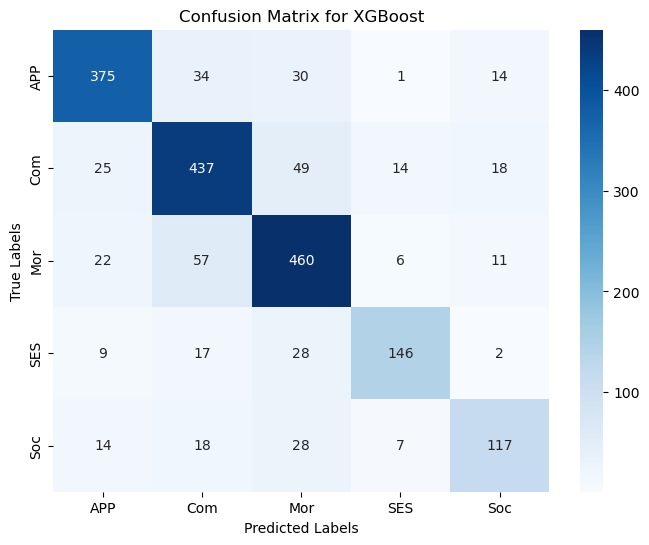

In [78]:
# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))
sns.heatmap(result["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', xticklabels=['APP', 'Com', 'Mor', 'SES', 'Soc'], yticklabels=['APP', 'Com', 'Mor', 'SES', 'Soc'])
plt.title(f"Confusion Matrix for {model_name}")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Training SVM...


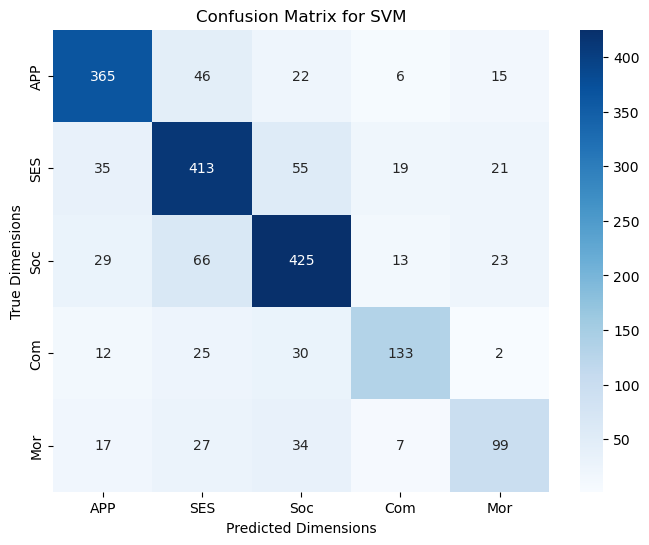

Training Logistic Regression...


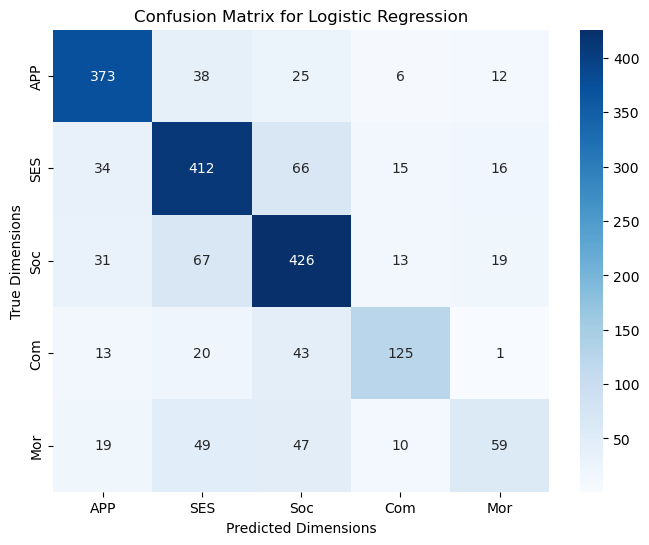

Training XGBoost...


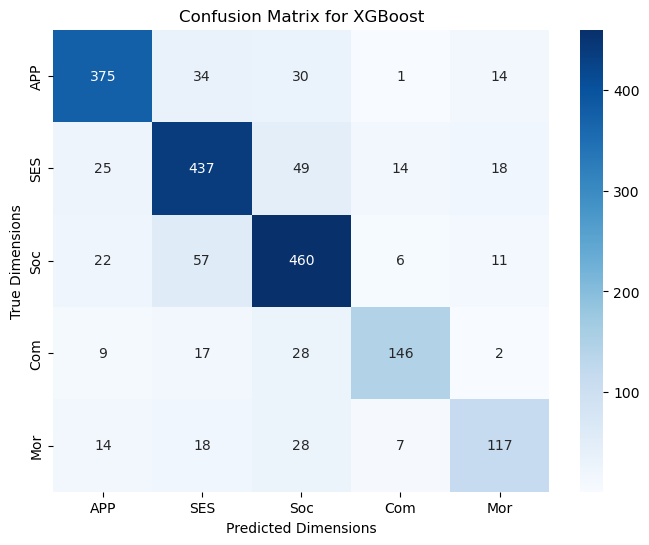


Results for SVM:
F1 Score: 0.7387213619202294
Confusion Matrix:
[[365  46  22   6  15]
 [ 35 413  55  19  21]
 [ 29  66 425  13  23]
 [ 12  25  30 133   2]
 [ 17  27  34   7  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       454
           1       0.72      0.76      0.74       543
           2       0.75      0.76      0.76       556
           3       0.75      0.66      0.70       202
           4       0.62      0.54      0.58       184

    accuracy                           0.74      1939
   macro avg       0.73      0.71      0.71      1939
weighted avg       0.74      0.74      0.74      1939


Results for Logistic Regression:
F1 Score: 0.712170524873862
Confusion Matrix:
[[373  38  25   6  12]
 [ 34 412  66  15  16]
 [ 31  67 426  13  19]
 [ 13  20  43 125   1]
 [ 19  49  47  10  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np

# 数据准备
X = np.array(df["Vector_cleaned"].tolist())  # 将向量列转为 NumPy 数组
y = df["Dimension_cleaned"]  # 分类标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化训练集和测试集
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义分类器
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# 存储结果
results = {}

# 训练和测试分类器
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测测试集
    y_pred = model.predict(X_test_scaled)
    
    # 计算 F1 值
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    
    # 分类报告
    report = classification_report(y_test, y_pred, digits=3)
    
    # 保存结果
    results[model_name] = {
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }

    # 绘制混淆矩阵热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['APP', 'SES', 'Soc', 'Com', 'Mor'], yticklabels=['APP', 'SES', 'Soc', 'Com', 'Mor'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Dimensions')
    plt.ylabel('True Dimensions')
    plt.show()

# 输出结果
for model_name, result in results.items():
    print(f"\nResults for {model_name}:")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")


### 以下是探讨SMOTE，暂时还不行

In [70]:
# 升级 imbalanced-learn 和 scikit-learn 到最新版本
!pip install --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--

ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'D:\\Anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [73]:
# 检查 scikit-learn 和 imbalanced-learn 的版本
!pip show scikit-learn
!pip show imbalanced-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [74]:
!pip install --upgrade imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np

# 数据准备
X = np.array(df["Vector_cleaned"].tolist())  # 将向量列转为 NumPy 数组
y = df["Dimension_cleaned"]  # 分类标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化训练集和测试集
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用 SMOTE 对训练集进行过采样
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 定义分类器
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# 存储结果
results = {}

# 训练和测试分类器
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # 训练模型
    model.fit(X_train_smote, y_train_smote)
    
    # 预测测试集
    y_pred = model.predict(X_test_scaled)
    
    # 计算 F1 值
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    
    # 分类报告
    report = classification_report(y_test, y_pred)
    
    # 保存结果
    results[model_name] = {
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }

# 输出结果
for model_name, result in results.items():
    print(f"\nResults for {model_name}:")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (d:\Anaconda3\Lib\site-packages\imblearn\utils\_validation.py)